In [1]:
import warnings
warnings.filterwarnings('ignore')
from sys import argv
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks',color_codes=True)
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
from scipy.stats import ttest_1samp,wilcoxon,shapiro,ttest_ind,mannwhitneyu,levene,bartlett
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare,chi2_contingency,f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import ProbPlot
import pylab
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering 

In [3]:
data=pd.read_csv('pima-indians-diabetes.data',header=None,names=['Pregnancies','Glucose','BloodPressure','SkinThickness',
                                                                 'Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

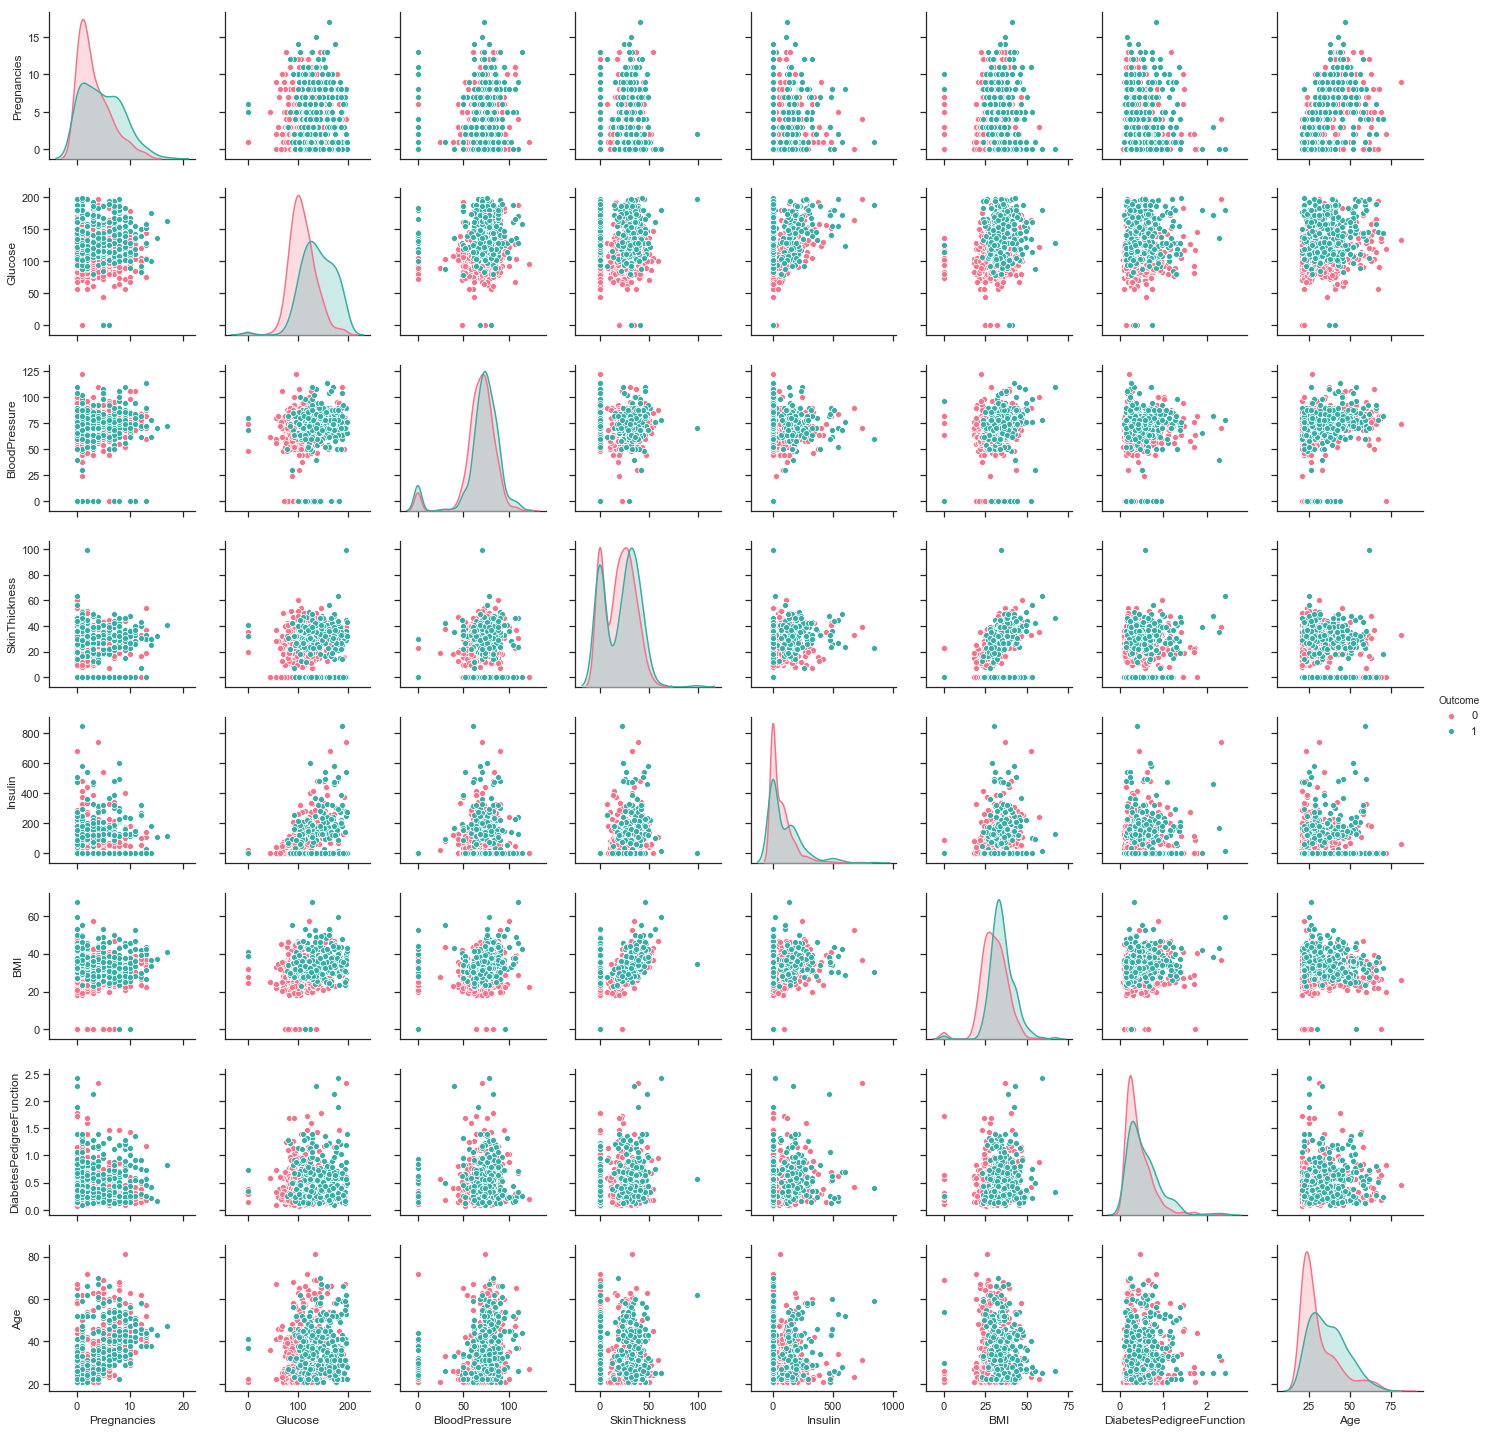

In [6]:
i=sns.pairplot(data,vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                        'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome',palette='husl')

In [7]:
x=data.drop('Outcome',axis=1)

In [8]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
x.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [10]:
sc=StandardScaler()
x_std=sc.fit_transform(x)

In [11]:
cov_mat=np.cov(x_std.T)
print("conventional matrix\n%s",cov_mat)

conventional matrix
%s [[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]


In [12]:
cov_mat.shape

(8, 8)

In [13]:
eigenvalues,eigenvactors=np.linalg.eig(cov_mat)

In [14]:
print('Eigen Value \n%s',eigenvalues)
print('Eigen vectors \n%s',eigenvactors)

Eigen Value 
%s [2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]
Eigen vectors 
%s [[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]]


In [15]:
tot=sum(eigenvalues)
var_exp=[(i/tot)*100 for i in sorted (eigenvalues,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Cumulative variance explained',cum_var_exp)

Cumulative variance explained [ 26.17974932  47.81987607  60.69024944  71.63436249  81.16366731
  89.69652215  94.9442244  100.        ]


In [16]:
sum(eigenvalues)

8.010430247718388

In [17]:
# percentage of 7th eigen value
0.87667054/sum(eigenvalues)

0.10944113023763015

In [18]:
# make a set of (eigenvalues, eigenvectors) pairs
eig_pair=[(eigenvalues[index],eigenvactors[:,index])for index in range(len(eigenvalues))]

In [19]:
(eigenvalues[0],eigenvactors[:,0])

(2.0971105579945313,
 array([-0.1284321 , -0.39308257, -0.36000261, -0.43982428, -0.43502617,
        -0.45194134, -0.27061144, -0.19802707]))

In [20]:
eig_pair

[(2.0971105579945313,
  array([-0.1284321 , -0.39308257, -0.36000261, -0.43982428, -0.43502617,
         -0.45194134, -0.27061144, -0.19802707])),
 (1.733467259447126,
  array([-0.59378583, -0.17402908, -0.18389207,  0.33196534,  0.25078106,
          0.1009598 ,  0.122069  , -0.62058853])),
 (0.4203635280495675,
  array([-0.58879003, -0.06015291, -0.19211793,  0.28221253, -0.13200992,
         -0.03536644, -0.08609107,  0.71208542])),
 (0.40498937781489847,
  array([ 0.11784098,  0.45035526, -0.01129554,  0.5662838 , -0.54862138,
         -0.34151764, -0.00825873, -0.21166198])),
 (0.6835183858447279,
  array([-0.19359817, -0.09416176,  0.6341159 , -0.00958944,  0.27065061,
         -0.68537218,  0.08578409,  0.03335717])),
 (0.7633383156496737,
  array([ 0.47560573, -0.46632804, -0.32795306,  0.48786206,  0.34693481,
         -0.25320376, -0.11981049,  0.10928996])),
 (0.87667054190948,
  array([-0.08069115,  0.40432871, -0.05598649, -0.03797608,  0.34994376,
         -0.05364595, -0

In [21]:
eig_pair.sort()#to arrange in assending order

In [22]:
eig_pair# after assending

[(0.40498937781489847,
  array([ 0.11784098,  0.45035526, -0.01129554,  0.5662838 , -0.54862138,
         -0.34151764, -0.00825873, -0.21166198])),
 (0.4203635280495675,
  array([-0.58879003, -0.06015291, -0.19211793,  0.28221253, -0.13200992,
         -0.03536644, -0.08609107,  0.71208542])),
 (0.6835183858447279,
  array([-0.19359817, -0.09416176,  0.6341159 , -0.00958944,  0.27065061,
         -0.68537218,  0.08578409,  0.03335717])),
 (0.7633383156496737,
  array([ 0.47560573, -0.46632804, -0.32795306,  0.48786206,  0.34693481,
         -0.25320376, -0.11981049,  0.10928996])),
 (0.87667054190948,
  array([-0.08069115,  0.40432871, -0.05598649, -0.03797608,  0.34994376,
         -0.05364595, -0.8336801 , -0.0712006 ])),
 (1.0309722810083826,
  array([ 0.01308692, -0.46792282,  0.53549442,  0.2376738 , -0.33670893,
          0.36186463, -0.43318905, -0.07524755])),
 (1.733467259447126,
  array([-0.59378583, -0.17402908, -0.18389207,  0.33196534,  0.25078106,
          0.1009598 ,  0

In [23]:
eig_pair.reverse()# to decending the data

In [24]:
eig_pair# after decending

[(2.0971105579945313,
  array([-0.1284321 , -0.39308257, -0.36000261, -0.43982428, -0.43502617,
         -0.45194134, -0.27061144, -0.19802707])),
 (1.733467259447126,
  array([-0.59378583, -0.17402908, -0.18389207,  0.33196534,  0.25078106,
          0.1009598 ,  0.122069  , -0.62058853])),
 (1.0309722810083826,
  array([ 0.01308692, -0.46792282,  0.53549442,  0.2376738 , -0.33670893,
          0.36186463, -0.43318905, -0.07524755])),
 (0.87667054190948,
  array([-0.08069115,  0.40432871, -0.05598649, -0.03797608,  0.34994376,
         -0.05364595, -0.8336801 , -0.0712006 ])),
 (0.7633383156496737,
  array([ 0.47560573, -0.46632804, -0.32795306,  0.48786206,  0.34693481,
         -0.25320376, -0.11981049,  0.10928996])),
 (0.6835183858447279,
  array([-0.19359817, -0.09416176,  0.6341159 , -0.00958944,  0.27065061,
         -0.68537218,  0.08578409,  0.03335717])),
 (0.4203635280495675,
  array([-0.58879003, -0.06015291, -0.19211793,  0.28221253, -0.13200992,
         -0.03536644, -0.

In [25]:
#Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort=[eig_pair[index][0] for index in range(len(eigenvalues))]
eigvectors_sort=[eig_pair[index][1] for index in range(len(eigenvactors))]
#lets conform oour sorting worked print out eigenvalues
print('Eigenvalues in decending order: \n%s'%eigvalues_sort)

Eigenvalues in decending order: 
[2.0971105579945313, 1.733467259447126, 1.0309722810083826, 0.87667054190948, 0.7633383156496737, 0.6835183858447279, 0.4203635280495675, 0.40498937781489847]


In [26]:
eigvectors_sort #Eigen vector is rowwise

[array([-0.1284321 , -0.39308257, -0.36000261, -0.43982428, -0.43502617,
        -0.45194134, -0.27061144, -0.19802707]),
 array([-0.59378583, -0.17402908, -0.18389207,  0.33196534,  0.25078106,
         0.1009598 ,  0.122069  , -0.62058853]),
 array([ 0.01308692, -0.46792282,  0.53549442,  0.2376738 , -0.33670893,
         0.36186463, -0.43318905, -0.07524755]),
 array([-0.08069115,  0.40432871, -0.05598649, -0.03797608,  0.34994376,
        -0.05364595, -0.8336801 , -0.0712006 ]),
 array([ 0.47560573, -0.46632804, -0.32795306,  0.48786206,  0.34693481,
        -0.25320376, -0.11981049,  0.10928996]),
 array([-0.19359817, -0.09416176,  0.6341159 , -0.00958944,  0.27065061,
        -0.68537218,  0.08578409,  0.03335717]),
 array([-0.58879003, -0.06015291, -0.19211793,  0.28221253, -0.13200992,
        -0.03536644, -0.08609107,  0.71208542]),
 array([ 0.11784098,  0.45035526, -0.01129554,  0.5662838 , -0.54862138,
        -0.34151764, -0.00825873, -0.21166198])]

In [27]:
eigvectors_sort[0:7]

[array([-0.1284321 , -0.39308257, -0.36000261, -0.43982428, -0.43502617,
        -0.45194134, -0.27061144, -0.19802707]),
 array([-0.59378583, -0.17402908, -0.18389207,  0.33196534,  0.25078106,
         0.1009598 ,  0.122069  , -0.62058853]),
 array([ 0.01308692, -0.46792282,  0.53549442,  0.2376738 , -0.33670893,
         0.36186463, -0.43318905, -0.07524755]),
 array([-0.08069115,  0.40432871, -0.05598649, -0.03797608,  0.34994376,
        -0.05364595, -0.8336801 , -0.0712006 ]),
 array([ 0.47560573, -0.46632804, -0.32795306,  0.48786206,  0.34693481,
        -0.25320376, -0.11981049,  0.10928996]),
 array([-0.19359817, -0.09416176,  0.6341159 , -0.00958944,  0.27065061,
        -0.68537218,  0.08578409,  0.03335717]),
 array([-0.58879003, -0.06015291, -0.19211793,  0.28221253, -0.13200992,
        -0.03536644, -0.08609107,  0.71208542])]

In [28]:
p_re=np.array(eigvectors_sort[0:7]).transpose()
p_re.shape

(8, 7)

In [29]:
p_re

array([[-0.1284321 , -0.59378583,  0.01308692, -0.08069115,  0.47560573,
        -0.19359817, -0.58879003],
       [-0.39308257, -0.17402908, -0.46792282,  0.40432871, -0.46632804,
        -0.09416176, -0.06015291],
       [-0.36000261, -0.18389207,  0.53549442, -0.05598649, -0.32795306,
         0.6341159 , -0.19211793],
       [-0.43982428,  0.33196534,  0.2376738 , -0.03797608,  0.48786206,
        -0.00958944,  0.28221253],
       [-0.43502617,  0.25078106, -0.33670893,  0.34994376,  0.34693481,
         0.27065061, -0.13200992],
       [-0.45194134,  0.1009598 ,  0.36186463, -0.05364595, -0.25320376,
        -0.68537218, -0.03536644],
       [-0.27061144,  0.122069  , -0.43318905, -0.8336801 , -0.11981049,
         0.08578409, -0.08609107],
       [-0.19802707, -0.62058853, -0.07524755, -0.0712006 ,  0.10928996,
         0.03335717,  0.71208542]])

In [30]:
proj_data_7d=np.dot(x_std,p_re)
proj_data_7d.shape

(768, 7)

In [31]:
proj_data_7d[:,0]

array([-1.06850273e+00,  1.12168331e+00,  3.96476711e-01,  1.11578081e+00,
       -2.35933421e+00,  1.43575130e+00,  9.30175625e-01,  2.14980639e+00,
       -3.29792496e+00,  1.83985025e+00,  5.32553793e-01, -4.47940689e-01,
       -7.03978063e-01, -3.78710653e+00, -1.00815137e+00,  2.41617363e+00,
       -2.21131106e+00,  1.18058684e+00,  1.54120312e-01, -3.33247439e-01,
       -2.03675040e+00,  2.92404914e-01, -1.12667783e+00, -5.98559712e-02,
       -1.98753035e+00, -4.47031103e-01, -1.15506808e-01,  1.06700672e+00,
       -6.10604156e-01,  3.54937303e-01, -5.98061975e-01, -1.80223357e+00,
        1.77356772e+00,  1.72914040e+00, -3.80116311e-01, -3.25297326e-01,
        1.99867684e-01, -6.70143930e-01, -9.60566551e-02, -2.57544743e+00,
       -5.14985014e-01, -3.95739636e-01,  4.86145648e-01, -3.59724534e+00,
        6.68831115e-01, -2.32728476e+00,  1.03924570e+00,  1.11579225e+00,
       -1.22647070e-01,  4.35655374e+00,  1.27677303e+00,  1.55178368e+00,
        1.21645041e+00, -

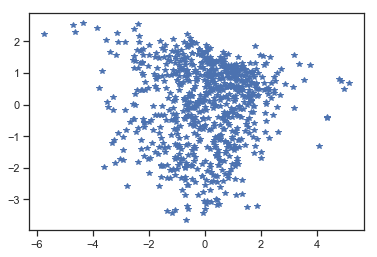

In [32]:
plt.plot(proj_data_7d[:,0],proj_data_7d[:,1],'*')

In [33]:
kmeans_pca=KMeans(n_clusters=2,n_init=15,random_state=2)
kmeans_pca.fit(proj_data_7d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [34]:
kmeans_pca.inertia_

4818.395949405269

In [35]:
kmeans_pca.labels_

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,

In [36]:
x['Class'] = kmeans_pca.labels_

In [37]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,0


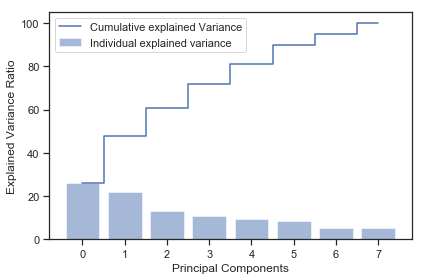

In [38]:
plt.figure(figsize=(6,4))
plt.bar(range(8),var_exp,alpha=0.5,align='center',label='Individual explained variance')
plt.step(range(8),cum_var_exp,where='mid',label= 'Cumulative explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [39]:
x['Class'].value_counts()

0    496
1    272
Name: Class, dtype: int64

In [40]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### From the above count the health people are 496 and diabetes are 272 and from the original data set healthy people count are 500  and diabetes count is 268.

#### By performing the PCA methoth inertia rate less (4818.395) compareed to kmeans inertia(5128.82). 

## Contunicion of inclass day3 analising sub cleaster in the diabetes

#### using AgglomerativeClustering

In [43]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [103]:
x=x.drop('labels',axis=1)

KeyError: "['labels'] not found in axis"

In [99]:
model2.fit(x)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [100]:
L=pd.DataFrame(model2.labels_)
L[0].value_counts()

2    384
0    379
1      5
Name: 0, dtype: int64

In [101]:
## creating a new dataframe only for labels and converting it into categorical variable
AGC_labels = pd.DataFrame(model2.labels_ , columns = list(['labels']))

AGC_labels['labels'] = AGC_labels['labels'].astype('category')

In [102]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
AGC_labeled = x.join(AGC_labels)
AGC_labeled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,labels
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,2
4,0,137,40,35,168,43.1,2.288,33,2


In [55]:
AGC_clusters = AGC_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)

In [56]:
(Df0.shape,Df1.shape,Df2.shape)

((342, 10), (390, 10), (36, 10))

In [59]:
# Calculating the centroids which will be the mean of each group
c0 = Df0.iloc[:,:-1].mean().values
c1 = Df1.iloc[:,:-1].mean().values
c2 = Df2.iloc[:,:-1].mean().values

In [60]:
c0

array([  5.94152047, 135.51461988,  75.79532164,  21.50877193,
       104.01461988,  32.94269006,   0.53633918,  41.64619883,
         0.73099415])

In [61]:
c1

array([2.03333333e+00, 1.08433333e+02, 6.95564103e+01, 2.13948718e+01,
       6.58666667e+01, 3.17343590e+01, 4.22612821e-01, 2.61282051e+01,
       4.87179487e-02])

In [62]:
c2

array([3.55555556e+00, 1.17000000e+02, 6.66666667e-01, 2.00000000e+00,
       6.94444444e-01, 2.57638889e+01, 3.93166667e-01, 3.04444444e+01,
       8.33333333e-02])

In [64]:
AGC_I0=0
AGC_I1=0
AGC_I2=0
for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-c0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-c1)**2)
for i in np.arange(Df2.shape[0]):
  AGC_I2=AGC_I2+np.sum((Df2.iloc[i,:-1]-c2)**2)

In [65]:
AGC_I0,AGC_I1,AGC_I2

(8302404.51958563, 2391415.604576791, 40673.23615722222)

In [66]:
AGC_I0+AGC_I1+AGC_I2

10734493.360319642

In [67]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='cosine',  linkage='average')

In [68]:
model2.fit(x_std)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [69]:
L=pd.DataFrame(model2.labels_)
L[0].value_counts()

0    281
1    259
2    228
Name: 0, dtype: int64

In [104]:
## creating a new dataframe only for labels and converting it into categorical variable
AGC_labels = pd.DataFrame(model2.labels_ , columns = list(['labels']))

AGC_labels['labels'] = AGC_labels['labels'].astype('category')

In [105]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
AGC_labeled = x.join(AGC_labels)
AGC_labeled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,labels
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,2
4,0,137,40,35,168,43.1,2.288,33,2


In [106]:
AGC_clusters = AGC_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)

In [107]:
(Df0.shape,Df1.shape,Df2.shape)

((379, 9), (5, 9), (384, 9))

In [108]:
Df0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,4.424802,120.401055,67.432718,11.712401,0.474934,30.937995,0.422156,35.662269
std,3.455158,30.416293,24.484907,15.844620,3.136452,8.500338,0.316210,12.718853
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.500000,0.211000,25.000000
50%,4.000000,115.000000,72.000000,0.000000,0.000000,31.000000,0.304000,32.000000
75%,7.000000,138.000000,80.000000,27.000000,0.000000,35.600000,0.558000,43.000000
max,14.000000,199.000000,122.000000,99.000000,29.000000,59.400000,2.420000,72.000000


In [109]:
Df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,5.00000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2.80000,0.0,67.600000,29.600000,4.600000,32.880000,0.380200,28.600000
std,2.48998,0.0,12.033287,9.343447,10.285913,7.033989,0.215527,9.607289
min,1.00000,0.0,48.000000,20.000000,0.000000,24.700000,0.140000,21.000000
25%,1.00000,0.0,68.000000,20.000000,0.000000,27.700000,0.299000,22.000000
50%,1.00000,0.0,68.000000,32.000000,0.000000,32.000000,0.346000,22.000000
75%,5.00000,0.0,74.000000,35.000000,0.000000,39.000000,0.389000,37.000000
max,6.00000,0.0,80.000000,41.000000,23.000000,41.000000,0.727000,41.000000


In [110]:
Df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,3.286458,122.955729,70.776042,29.127604,159.070312,33.021875,0.522143,30.911458
std,3.198600,30.639666,12.307711,10.430767,118.260136,7.104931,0.339979,10.238282
min,0.000000,56.000000,30.000000,7.000000,32.000000,0.000000,0.085000,21.000000
25%,1.000000,99.750000,62.000000,21.000000,81.750000,28.400000,0.269000,23.000000
50%,2.000000,119.500000,70.000000,29.000000,127.500000,33.200000,0.452000,27.000000
75%,5.000000,143.000000,78.000000,37.000000,191.250000,37.100000,0.687000,36.000000
max,17.000000,198.000000,110.000000,60.000000,846.000000,67.100000,2.329000,81.000000


In [111]:
# Calculating the centroids which will be the mean of each group
c0 = Df0.iloc[:,:-1].mean().values
c1 = Df1.iloc[:,:-1].mean().values
c2 = Df2.iloc[:,:-1].mean().values

In [112]:
c0,c1,c2

(array([  4.42480211, 120.40105541,  67.43271768,  11.71240106,
          0.47493404,  30.93799472,   0.42215567,  35.66226913]),
 array([ 2.8   ,  0.    , 67.6   , 29.6   ,  4.6   , 32.88  ,  0.3802,
        28.6   ]),
 array([  3.28645833, 122.95572917,  70.77604167,  29.12760417,
        159.0703125 ,  33.021875  ,   0.52214323,  30.91145833]))

In [113]:
AGC_I0=0
AGC_I1=0
AGC_I2=0
for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-c0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-c1)**2)
for i in np.arange(Df2.shape[0]):
  AGC_I2=AGC_I2+np.sum((Df2.iloc[i,:-1]-c2)**2)

In [114]:
AGC_I0,AGC_I1,AGC_I2

(767950.0833795301, 1943.6938068, 5879118.44079329)

In [115]:
AGC_I0+AGC_I1+AGC_I2

6649012.21797962

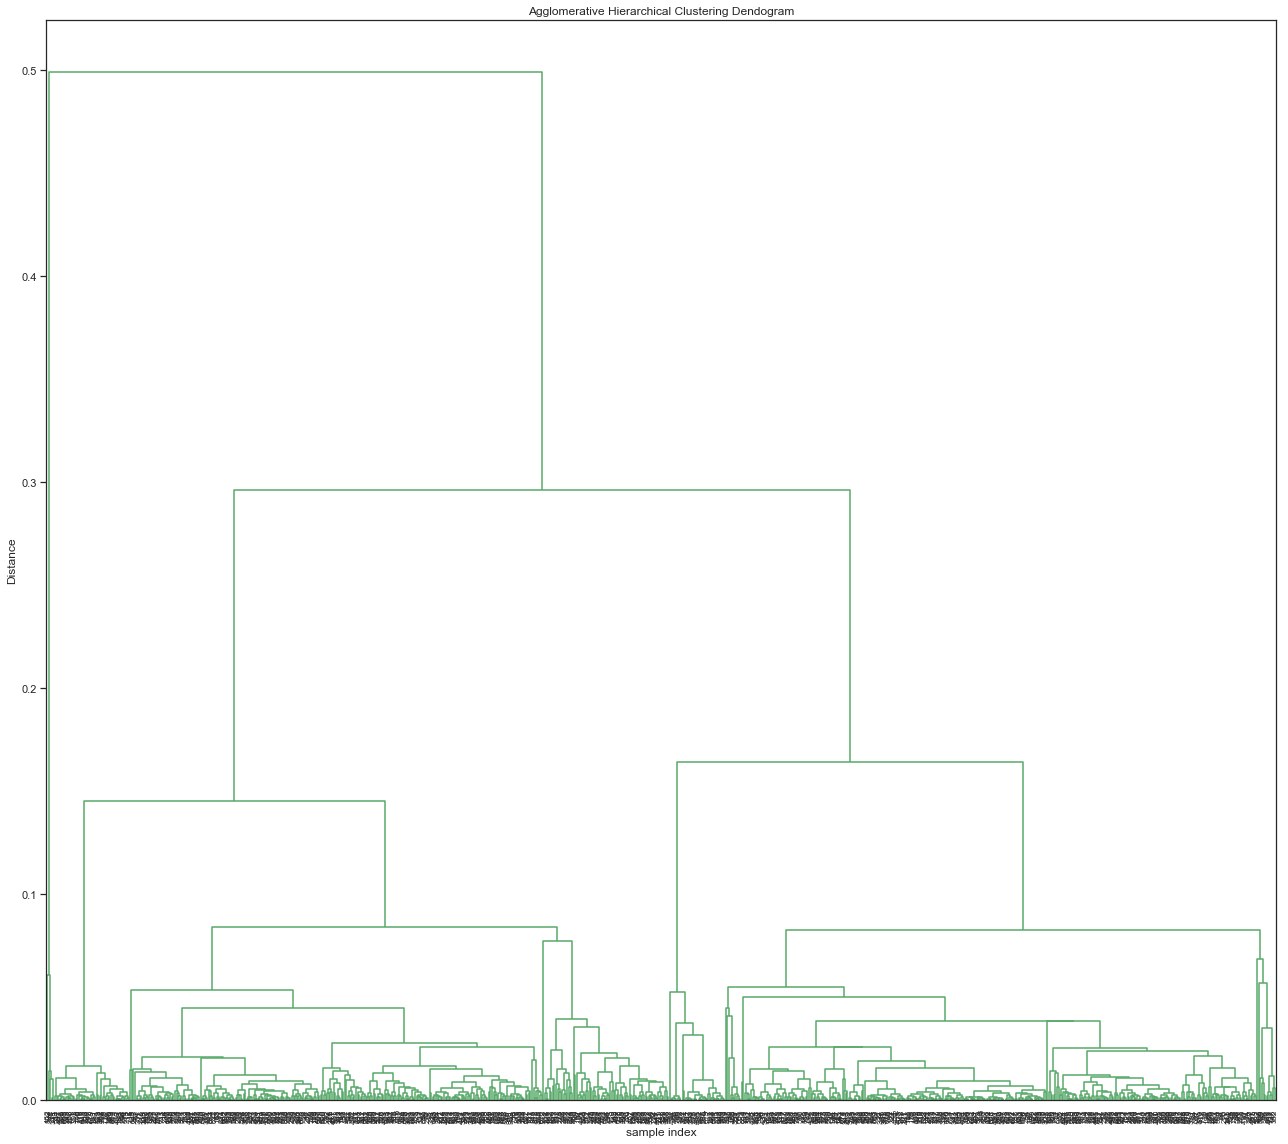

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(AGC_labeled,method='average',metric='cosine')
dendrogram(Z,leaf_rotation=90.0,p=3,color_threshold=3,leaf_font_size=8)
plt.tight_layout()

In [92]:
x=x.drop('Class',axis=1)

In [94]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [96]:
kmeans=KMeans(n_clusters=3,init=15,random_state=2)


In [97]:
kmeans.fit(x)

ValueError: the init parameter for the k-means should be 'k-means++' or 'random' or an ndarray, '15' (type '<class 'int'>') was passed.